# Machine Learning Foundation

## Course 3, Part a: Logistic Regression LAB


## Introduction

We will be using the [Human Activity Recognition with Smartphones](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) database, which was built from the recordings of study participants who carried a smartphone with an embedded inertial sensor while performing activities of daily living (ADL). The objective is to classify the activities the participants performed into one of the six following categories: walking, walking upstairs, walking downstairs, sitting, standing, and laying.

The following information is provided for each record in the dataset: 

- Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration 
- Triaxial Angular velocity from the gyroscope 
- A 561-feature vector with time and frequency domain variables 
- The activity label 

More information about the features are available on the website linked above.


In [ ]:
!pip install seaborn  
!pip install pandas
!pip install numpy
!pip install  matplotlib
!pip install scikit-learn

In [30]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [31]:
import seaborn as sns, pandas as pd, numpy as np

## Question 1

Import the data and do the following:

* Examine the data types--there are many columns, so it might be wise to use value counts.
* Determine if the floating point values need to be scaled.
* Determine the breakdown of each activity.
* Encode the activity label as an integer.


In [32]:
### BEGIN SOLUTION
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/Human_Activity_Recognition_Using_Smartphones_Data.csv", sep=',')

The data columns are all floats except for the activity label.


In [33]:
data.dtypes.value_counts()

float64    561
object       1
Name: count, dtype: int64

In [34]:
data.dtypes.tail()

angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
dtype: object

The data are all scaled from -1 (minimum) to 1.0 (maximum).


In [35]:
data.iloc[:, :-1].min().value_counts()

-1.0    561
Name: count, dtype: int64

In [36]:
data.iloc[:, :-1].max().value_counts()

1.0    561
Name: count, dtype: int64

Examine the breakdown of activities; they are relatively balanced.


In [37]:
data.Activity.value_counts()

Activity
LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: count, dtype: int64

Scikit learn classifiers won't accept a sparse matrix for the prediction column. Thus, either `LabelEncoder` needs to be used to convert the activity labels to integers, or if `DictVectorizer` is used, the resulting matrix must be converted to a non-sparse array.  
Use `LabelEncoder` to fit_transform the "Activity" column, and look at 5 random values.


In [38]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Activity'] = le.fit_transform(data.Activity)
data['Activity'].sample(5)
### END SOLUTION

505     5
604     0
6274    2
8133    2
5644    5
Name: Activity, dtype: int64

## Question 2

* Calculate the correlations between the dependent variables.
* Create a histogram of the correlation values.
* Identify those that are most correlated (either positively or negatively).


In [39]:
### BEGIN SOLUTION
# Calculate the correlation values
feature_cols = data.columns[:-1]
corr_values = data[feature_cols].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)

# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN
    
# Stack the data and convert to a data frame
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

A histogram of the absolute value correlations.


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

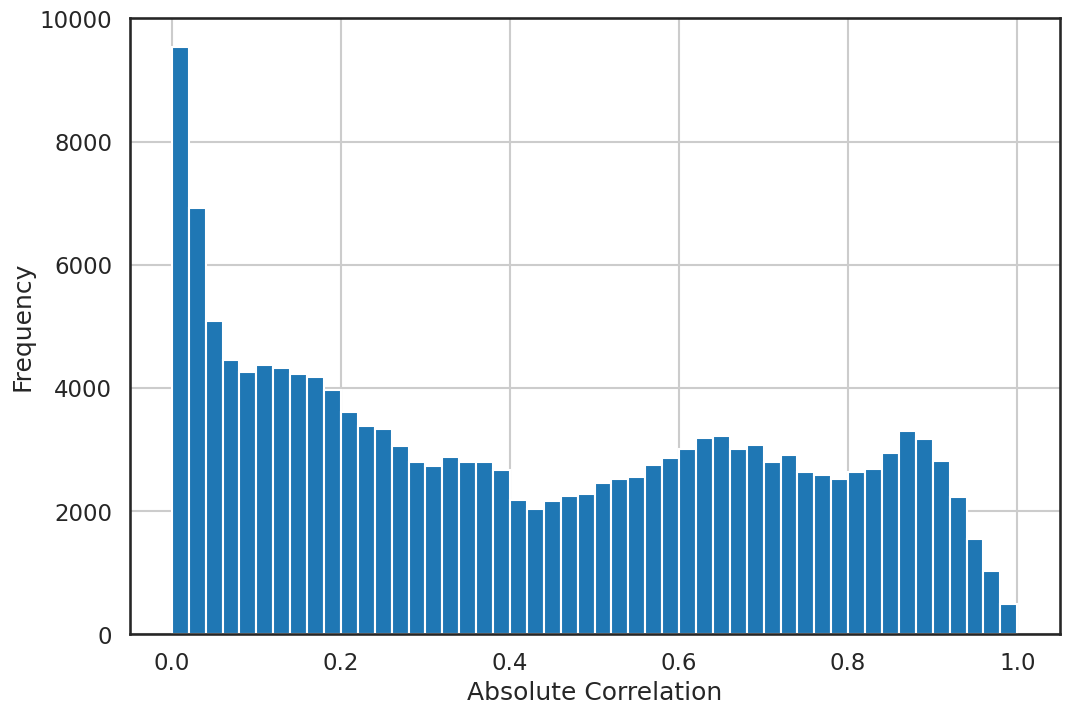

In [41]:
sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=50, figsize=(12, 8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

In [42]:
# The most highly correlated values
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.8')
### END SOLUTION

,feature1,feature2,correlation,abs_correlation
156894,fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-sma(),1.000000,1.000000
93902,tBodyAccMag-sma(),tGravityAccMag-sma(),1.000000,1.000000
101139,tBodyAccJerkMag-mean(),tBodyAccJerkMag-sma(),1.000000,1.000000
96706,tGravityAccMag-mean(),tGravityAccMag-sma(),1.000000,1.000000
94257,tBodyAccMag-energy(),tGravityAccMag-energy(),1.000000,1.000000
...,...,...,...,...
22657,tGravityAcc-mean()-Y,"angle(Y,gravityMean)",-0.993425,0.993425
39225,"tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4",-0.994267,0.994267
38739,"tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3",-0.994628,0.994628
23176,tGravityAcc-mean()-Z,"angle(Z,gravityMean)",-0.994764,0.994764


### **Resumen del Laboratorio sobre Regresión Logística y Métricas de Error**

Este laboratorio se enfoca en aplicar **regresión logística** y analizar **métricas de error** utilizando un conjunto de datos de **reconocimiento de actividad humana con teléfonos inteligentes**. En este conjunto de datos, sensores de teléfonos capturan información mientras los participantes realizan actividades como caminar, subir/bajar escaleras, estar de pie, sentados o acostados. El objetivo es **clasificar correctamente la actividad de cada persona** a partir de estas mediciones.

---

## **1. Preparación y Exploración de Datos**
### **Importación de datos y bibliotecas**
Se importan las bibliotecas necesarias, como `pandas` y `sklearn`, y se configura el directorio de trabajo. Luego, se cargan los datos en un **DataFrame de pandas** para su análisis.

### **Análisis de los datos:**
- Se examinan los **tipos de datos** de las columnas.
- Se verifica si los datos necesitan **escalado**, encontrando que los valores ya están normalizados en el rango **[-1, 1]**.
- Se analiza la **distribución de las actividades**, confirmando que el conjunto de datos es **balanceado** (cada actividad tiene aproximadamente la misma cantidad de muestras).
- Se **codifican las etiquetas de actividad** en valores enteros (0 a 5) usando `LabelEncoder` de `sklearn.preprocessing`, ya que los modelos de `sklearn` no pueden manejar valores categóricos directamente.

---

## **2. Análisis de Correlaciones**
Para mejorar la selección de características, se analizan las **correlaciones** entre las variables.

### **Pasos del análisis de correlación:**
1. **Calcular la matriz de correlaciones** usando `pandas.corr()`, que muestra cómo se relacionan las variables entre sí.
2. **Eliminar valores duplicados** en la matriz de correlación, ya que la correlación de \(X\) con \(Y\) es la misma que la de \(Y\) con \(X\).
3. **Visualizar las correlaciones** mediante un **histograma** para identificar patrones.
4. **Filtrar las correlaciones más altas** (\(|r| > 0.8\)), ya que valores muy correlacionados pueden indicar redundancia en los datos.

Este análisis ayuda a decidir si se deben **eliminar o transformar ciertas variables** antes de entrenar el modelo, optimizando el rendimiento y reduciendo la complejidad.

---

## **3. Implementación en Python con Scikit-Learn**
El código utiliza `scikit-learn` para procesar los datos y calcular métricas:

```python
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Cargar los datos
data = pd.read_csv("ruta/del/archivo.csv")

# Verificar tipos de datos
print(data.dtypes)

# Codificar la variable objetivo
encoder = LabelEncoder()
data["actividad"] = encoder.fit_transform(data["actividad"])

# Calcular la matriz de correlaciones
correlation_matrix = data.corr()

# Eliminar valores duplicados en la matriz
mask = np.tril(np.ones(correlation_matrix.shape), k=-1)
correlation_matrix = correlation_matrix.where(mask == 0)

# Filtrar correlaciones altas
high_correlations = correlation_matrix.stack().reset_index()
high_correlations.columns = ["Var1", "Var2", "Correlation"]
high_correlations = high_correlations[abs(high_correlations["Correlation"]) > 0.8]

# Mostrar histogramas de correlaciones
import matplotlib.pyplot as plt
plt.hist(high_correlations["Correlation"], bins=50)
plt.xlabel("Correlación")
plt.ylabel("Frecuencia")
plt.show()
```

---

## **4. Elección de la Métrica de Evaluación**
Dado que el conjunto de datos está **balanceado**, la **exactitud (accuracy)** es una métrica válida, pero también se pueden utilizar:
- **Precisión (precision)** y **recuperación (recall)** para cada clase.
- **F1-score** para evaluar el equilibrio entre precisión y recall.
- **Matriz de confusión** para analizar los errores en detalle.

---

## Question 3

* Split the data into train and test data sets. This can be done using any method, but consider using Scikit-learn's `StratifiedShuffleSplit` to maintain the same ratio of predictor classes.
* Regardless of the method used to split the data, compare the ratio of classes in both the train and test splits.

Pregunta 3

* Divida los datos en conjuntos de datos de entrenamiento y de prueba. Esto se puede hacer con cualquier método, pero considere usar «StratifiedShuffleSplit» de Scikit-learn para mantener la misma proporción de clases predictoras.
* Independientemente del método utilizado para dividir los datos, compare la proporción de clases en las divisiones de entrenamiento y de prueba.

In [18]:
### BEGIN SOLUTION
from sklearn.model_selection import StratifiedShuffleSplit

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols], data.Activity))

# Create the dataframes
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'Activity']

X_test  = data.loc[test_idx, feature_cols]
y_test  = data.loc[test_idx, 'Activity']

In [19]:
y_train.value_counts(normalize=True)

Activity
0    0.188792
2    0.185046
1    0.172562
3    0.167152
5    0.149951
4    0.136496
Name: proportion, dtype: float64

In [20]:
y_test.value_counts(normalize=True)
### END SOLUTION

Activity
0    0.188673
2    0.185113
1    0.172492
3    0.167314
5    0.149838
4    0.136570
Name: proportion, dtype: float64

## Question 4

* Fit a logistic regression model without any regularization using all of the features. Be sure to read the documentation about fitting a multi-class model so you understand the coefficient output. Store the model.
* Using cross validation to determine the hyperparameters and fit models using L1 and L2 regularization. Store each of these models as well. Note the limitations on multi-class models, solvers, and regularizations. The regularized models, in particular the L1 model, will probably take a while to fit.


In [21]:
### BEGIN SOLUTION
from sklearn.linear_model import LogisticRegression

# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)

In [ ]:
# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)
### END SOLUTION

## Question 5

* Compare the magnitudes of the coefficients for each of the models. If one-vs-rest fitting was used, each set of coefficients can be plotted separately. 


In [ ]:
### BEGIN SOLUTION
# Combine all the coefficients into a dataframe
coefficients = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    coeffs = mod.coef_
    coeff_label = pd.MultiIndex(levels=[[lab], [0,1,2,3,4,5]], 
                                 codes=[[0,0,0,0,0,0], [0,1,2,3,4,5]])
    coefficients.append(pd.DataFrame(coeffs.T, columns=coeff_label))

coefficients = pd.concat(coefficients, axis=1)

coefficients.sample(10)

Prepare six separate plots for each of the multi-class coefficients.


In [ ]:
fig, axList = plt.subplots(nrows=3, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10,10)

for ax in enumerate(axList):
    loc = ax[0]
    ax = ax[1]
    
    data = coefficients.xs(loc, level=1, axis=1)
    data.plot(marker='o', ls='', ms=2.0, ax=ax, legend=False)
    
    if ax is axList[0]:
        ax.legend(loc=4)
        
    ax.set(title='Coefficient Set '+str(loc))

plt.tight_layout()
### END SOLUTION

### **Resumen del Laboratorio: División de Datos, Ajuste de Modelos y Análisis de Coeficientes en Regresión Logística Multiclase**  

En esta sección del laboratorio, se aborda la **división del conjunto de datos**, el **ajuste de modelos de regresión logística** y el **análisis de coeficientes** en un problema de clasificación multiclase utilizando el conjunto de datos de **reconocimiento de actividad humana con teléfonos inteligentes**.  

---

## **1. División de Datos en Conjuntos de Entrenamiento y Prueba**  
Para evaluar correctamente el modelo, se divide el conjunto de datos en **70% entrenamiento y 30% prueba** usando **StratifiedShuffleSplit** de `scikit-learn`. Este método garantiza que la distribución de las clases se mantenga equilibrada en ambos conjuntos.  

### **Pasos de la división:**
1. **Importar la función StratifiedShuffleSplit** de `sklearn.model_selection`.
2. **Configurar el objeto** con un `test_size=0.3` y un `random_state=42` para reproducibilidad.
3. **Aplicar la división** para obtener índices de entrenamiento y prueba.
4. **Separar las variables** en `X_train`, `y_train`, `X_test` y `y_test`.  

### **Código en Python:**
```python
from sklearn.model_selection import StratifiedShuffleSplit

# Configurar la división de datos
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

# Generar los índices de división
for train_index, test_index in split.split(data.drop("actividad", axis=1), data["actividad"]):
    X_train, X_test = data.iloc[train_index].drop("actividad", axis=1), data.iloc[test_index].drop("actividad", axis=1)
    y_train, y_test = data.iloc[train_index]["actividad"], data.iloc[test_index]["actividad"]

# Verificar la distribución de clases
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))
```
El uso de **`normalize=True`** permite verificar que las proporciones de cada clase sean similares en los conjuntos de entrenamiento y prueba.

---

## **2. Ajuste del Modelo de Regresión Logística Sin Regularización**  
Se ajusta una **regresión logística multiclase** sin regularización para establecer una línea base de rendimiento.

### **Puntos clave:**
- Se usa `LogisticRegression` de `scikit-learn` con `solver="liblinear"`, adecuado para clasificación multiclase con el enfoque **uno contra todos (OvR)**.
- Dado que hay **561 características**, se evalúa el impacto de cada una en la clasificación.
- Se entrena el modelo con `X_train` y `y_train`.

### **Código en Python:**
```python
from sklearn.linear_model import LogisticRegression

# Entrenar el modelo sin regularización
log_reg = LogisticRegression(solver="liblinear", multi_class="ovr")
log_reg.fit(X_train, y_train)
```

---

## **3. Ajuste de Modelos con Regularización (L1 y L2) y Validación Cruzada**  
Para mejorar el modelo, se implementa la **validación cruzada** con `LogisticRegressionCV`, ajustando **dos tipos de regularización**:
- **L1 (Lasso)**: Favorece modelos más simples eliminando coeficientes irrelevantes.
- **L2 (Ridge)**: Reduce la magnitud de los coeficientes sin eliminarlos por completo.

### **Pasos:**
1. Importar `LogisticRegressionCV`.
2. Configurar validación cruzada con `cv=4` (4 conjuntos de validación).
3. Evaluar diferentes valores de **C** (inverso de la regularización, similar a \(\lambda\)).

### **Código en Python:**
```python
from sklearn.linear_model import LogisticRegressionCV

# Modelo con regularización L1
log_reg_l1 = LogisticRegressionCV(Cs=10, penalty="l1", solver="liblinear", cv=4)
log_reg_l1.fit(X_train, y_train)

# Modelo con regularización L2
log_reg_l2 = LogisticRegressionCV(Cs=10, penalty="l2", solver="liblinear", cv=4)
log_reg_l2.fit(X_train, y_train)
```
⚠ **Nota**: El entrenamiento de estos modelos puede tomar varios minutos dependiendo de la capacidad de procesamiento.

---

## **4. Análisis de Coeficientes del Modelo**  
Después de entrenar los modelos, se analizan los **coeficientes** de cada uno para entender cómo influye cada característica en la clasificación.

### **Puntos clave:**
- La regresión logística genera un **coeficiente por cada clase y cada variable independiente**.
- Se analiza el efecto de cada característica en la probabilidad de pertenecer a una determinada clase en comparación con las demás.
- Se usa un **índice de múltiples niveles** para organizar los coeficientes en función de la penalización utilizada (L1 o L2).

### **Código en Python:**
```python
import pandas as pd

# Extraer coeficientes del modelo L1 y L2
coef_l1 = pd.DataFrame(log_reg_l1.coef_.T, columns=[f"L1_Class_{i}" for i in range(6)])
coef_l2 = pd.DataFrame(log_reg_l2.coef_.T, columns=[f"L2_Class_{i}" for i in range(6)])

# Concatenar resultados
coefficients = pd.concat([coef_l1, coef_l2], axis=1)
print(coefficients.head())
```
Cada columna representa una clase (0-5) y cada fila representa una característica diferente.

---

## **5. Visualización de los Coeficientes**
Se crea una **visualización de los coeficientes** de cada modelo para observar cómo afectan la clasificación.

### **Pasos:**
1. **Se generan seis subgráficas** (una por clase).
2. **Se traza un diagrama de dispersión** de los coeficientes para ver su impacto.
3. **Se observa la dispersión de valores**, destacando coeficientes altos o bajos.

### **Código en Python:**
```python
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 2, figsize=(12, 8))
axs = axs.flatten()

for i in range(6):
    axs[i].scatter(range(561), coefficients[f"L1_Class_{i}"], label="L1", alpha=0.5)
    axs[i].scatter(range(561), coefficients[f"L2_Class_{i}"], label="L2", alpha=0.5)
    axs[i].set_title(f"Clase {i}")
    axs[i].legend()

plt.tight_layout()
plt.show()
```
Esta gráfica ayuda a identificar **características relevantes y redundantes**, facilitando el proceso de **selección de variables**.

---

## **6. Próximos Pasos**
Después de analizar los coeficientes, se pasará a:
1. **Calcular predicciones y probabilidades** para cada clase.
2. **Evaluar el modelo** usando métricas como:
   - **Matriz de confusión**
   - **Precisión, recall y F1-score**
   - **Curva ROC y AUC**
3. **Optimizar hiperparámetros** y mejorar el modelo.

---

## **Conclusión**
- Se dividieron los datos en entrenamiento y prueba con **StratifiedShuffleSplit**.
- Se entrenaron **modelos de regresión logística** sin regularización, con **L1 (Lasso) y L2 (Ridge)**.
- Se realizó un **análisis de coeficientes** para comprender el impacto de cada variable.
- Se visualizaron los coeficientes para identificar patrones de correlación.

Este análisis es crucial para **mejorar la clasificación** y evitar **sobreajuste o subajuste** en modelos de aprendizaje automático. 🚀

## Question 6

* Predict and store the class for each model.
* Store the probability for the predicted class for each model. 


In [ ]:
### BEGIN SOLUTION
# Predict the class and the probability for each
y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.head()

In [ ]:
y_prob.head()
### END SOLUTION

## Question 7

For each model, calculate the following error metrics: 

* Accuracy
* Precision
* Recall
* F-score
* Confusion Matrix

Decide how to combine the multi-class metrics into a single value for each model.


In [ ]:
### BEGIN SOLUTION
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()

for lab in coeff_labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2,3,4,5]),
              label_binarize(y_pred[lab], classes=[0,1,2,3,4,5]), 
              average='weighted')
    
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)

In [ ]:
metrics
### END SOLUTION

## Question 8

* Display or plot the confusion matrix for each model.


In [ ]:
### BEGIN SOLUTION
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);
    
plt.tight_layout()
### END SOLUTION

### **Resumen del Laboratorio: Predicción de Clases, Probabilidades y Evaluación del Modelo en Regresión Logística Multiclase**  

En esta fase del laboratorio, se realizan **predicciones** sobre el conjunto de prueba utilizando **modelos de regresión logística multiclase**, almacenando tanto las etiquetas predichas como las **probabilidades de pertenencia a cada clase**. Luego, se evalúa el rendimiento de los modelos utilizando **métricas de clasificación** como **precisión, recall, F1-score y la curva ROC-AUC**. Finalmente, se analiza la **matriz de confusión** para identificar patrones de error y clases que suelen confundirse.

---

## **1. Generación de Predicciones y Probabilidades**  
Se generan **predicciones de clase** y **probabilidades de pertenencia a cada categoría** para cada modelo (LR, L1 y L2).

### **Pasos:**
1. **Crear listas vacías** para almacenar predicciones y probabilidades de cada modelo.
2. **Iterar sobre cada modelo** (`LR`, `L1`, `L2`) para obtener:
   - Etiqueta de clase predicha (0, 1, 2, 3, 4 o 5).
   - Probabilidades para cada clase (seis valores por muestra).
3. **Estructurar los resultados** en un **DataFrame con índice multinivel**, organizando modelos y clases.

### **Código en Python:**
```python
import pandas as pd

# Almacenar predicciones y probabilidades
predictions = []
probabilities = []

for model_label, model in zip(["LR", "L1", "L2"], [log_reg, log_reg_l1, log_reg_l2]):
    # Predicciones de etiquetas
    pred = pd.Series(model.predict(X_test), name=model_label)
    predictions.append(pred)

    # Probabilidades de cada clase
    prob = pd.DataFrame(model.predict_proba(X_test), columns=[f"{model_label}_Class_{i}" for i in range(6)])
    probabilities.append(prob)

# Concatenar predicciones y probabilidades
y_pred = pd.concat(predictions, axis=1)
y_prob = pd.concat(probabilities, axis=1)

# Visualizar las primeras filas
print(y_pred.head())
print(y_prob.head())
```
Este procedimiento permite analizar cómo cada modelo asigna probabilidades y cómo influye en la predicción final.

---

## **2. Evaluación del Modelo: Precisión, Recall y F1-score**  
Se utilizan métricas de clasificación para medir el rendimiento del modelo.

### **Métricas utilizadas:**
1. **Precisión (Precision)**: Qué proporción de predicciones positivas fueron correctas.
2. **Sensibilidad o Recall**: Qué proporción de la clase positiva fue identificada correctamente.
3. **F1-score**: Media armónica entre precisión y recall.
4. **Curva ROC-AUC**: Evalúa la capacidad del modelo para distinguir entre clases.

### **Código en Python:**
```python
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score

# Calcular métricas para el modelo LR
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred["LR"], average="weighted")
roc_auc = roc_auc_score(pd.get_dummies(y_test), y_prob.iloc[:, :6])  # Considerando LR solamente

# Mostrar resultados
print(f"Precisión: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
```
Estas métricas permiten evaluar **cuán bien se clasifica cada actividad** y detectar posibles deficiencias del modelo.

---

## **3. Análisis de la Matriz de Confusión**  
La **matriz de confusión** ayuda a identificar **clases que el modelo confunde con mayor frecuencia**.

### **Pasos:**
1. **Generar la matriz de confusión** para cada modelo.
2. **Visualizarla con un heatmap** para interpretar los errores.

### **Código en Python:**
```python
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Crear y visualizar la matriz de confusión para el modelo LR
conf_mat = confusion_matrix(y_test, y_pred["LR"])

plt.figure(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - LR")
plt.show()
```
Este análisis revela que ciertas clases, como **estar sentado y estar de pie**, suelen confundirse, lo que podría explicarse por características similares en los datos.

---

## **4. Conclusión y Próximos Pasos**  
- Se realizaron **predicciones y almacenamiento de probabilidades** para cada modelo.  
- Se evaluó el desempeño utilizando **precisión, recall, F1-score y ROC-AUC**.  
- Se generó una **matriz de confusión**, identificando clases problemáticas.  
- Se observó que el modelo confunde actividades similares, lo que sugiere la necesidad de mejorar la selección de características o probar modelos más avanzados.  

En la siguiente etapa del laboratorio, se explorará **K-Vecinos Más Cercanos (KNN)** como otro método de clasificación. 🚀

---
### Machine Learning Foundation (C) 2020 IBM Corporation
